In [1]:
from google.colab import files

# Upload file dialog
uploaded = files.upload()

# Unzip uploaded file (assuming only one file uploaded)
import zipfile
import io

for fn in uploaded.keys():
    print(f'Unzipping: {fn}')
    with zipfile.ZipFile(io.BytesIO(uploaded[fn]), 'r') as zip_ref:
        zip_ref.extractall()

Saving Deep-learning-project-main.zip to Deep-learning-project-main.zip
Unzipping: Deep-learning-project-main.zip


In [2]:
from google.colab import files

# Upload file dialog
uploaded = files.upload()

# Unzip uploaded file (assuming only one file uploaded)
import zipfile
import io

for fn in uploaded.keys():
    print(f'Unzipping: {fn}')
    with zipfile.ZipFile(io.BytesIO(uploaded[fn]), 'r') as zip_ref:
        zip_ref.extractall()

Saving Segmented_Reduced.zip to Segmented_Reduced.zip
Unzipping: Segmented_Reduced.zip


In [3]:
import os
import shutil
import glob
import random
from sklearn.model_selection import train_test_split

random.seed(42)

# Source folder for augmented farm images
src_farm = '/content/Deep-learning-project-main/augmented_farm_backgrounds'

# Destination directories for the farm experiment:
dest_farm_train = '/content/data_farm_train'
dest_farm_val   = '/content/data_farm_val'
dest_farm_test  = '/content/test_farm_backgrounds'  # This common test set will be used for both experiments

# Create folder structure for each destination
for dest in [dest_farm_train, dest_farm_val, dest_farm_test]:
    os.makedirs(os.path.join(dest, 'healthy'), exist_ok=True)
    os.makedirs(os.path.join(dest, 'unhealthy'), exist_ok=True)

# Iterate over each category folder in the farm data
categories = [cat for cat in os.listdir(src_farm) if os.path.isdir(os.path.join(src_farm, cat))]
print("Augmented Farm Categories:", categories)

for cat in categories:
    cat_path = os.path.join(src_farm, cat)
    # Get image files (adjust file extensions if needed)
    images = glob.glob(os.path.join(cat_path, '*.jpg')) + glob.glob(os.path.join(cat_path, '*.png'))
    # Determine label based on folder name
    label = 'healthy' if 'healthy' in cat.lower() else 'unhealthy'

    # Split: 70% train, 15% validation, 15% test
    if images:
        train_imgs, temp_imgs = train_test_split(images, train_size=0.7, random_state=42)
        val_imgs, test_imgs   = train_test_split(temp_imgs, test_size=0.5, random_state=42)

        for img in train_imgs:
            shutil.copy(img, os.path.join(dest_farm_train, label))
        for img in val_imgs:
            shutil.copy(img, os.path.join(dest_farm_val, label))
        for img in test_imgs:
            shutil.copy(img, os.path.join(dest_farm_test, label))

print("Augmented Farm data splitting completed!")

Augmented Farm Categories: ['Cherry_(including_sour)___Powdery_mildew_25', 'Blueberry___healthy_25', 'Strawberry___Leaf_scorch_25', 'Tomato___Early_blight_25', 'Corn_(maize)___healthy_25', 'Potato___Late_blight_25', 'Apple___Black_rot_25', 'Corn_(maize)___Common_rust__25', 'Orange___Haunglongbing_(Citrus_greening)_25', 'Peach___healthy_25', 'Pepper,_bell___healthy_25', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus_25', 'Tomato___Leaf_Mold_25', 'Squash___Powdery_mildew_25', 'Apple___Cedar_apple_rust_25', 'Grape___Black_rot_25', 'Tomato___Spider_mites Two-spotted_spider_mite_25', 'Apple___healthy_25', 'Strawberry___healthy_25', 'Peach___Bacterial_spot_25', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)_25', 'Soybean___healthy_25', 'Cherry_(including_sour)___healthy_25', 'Tomato___Bacterial_spot_25', 'Potato___healthy_25', 'Potato___Early_blight_25', 'Apple___Apple_scab_25', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot_25', 'Tomato___Late_blight_25', 'Grape___Esca_(Black_Measles)_25', 'Toma

In [4]:
# Source folder for augmented pixel data
src_pixel = '/content/Deep-learning-project-main/augmented_random_pixels'

# Destination directories for the pixel experiment:
dest_pixel_train = '/content/data_pixel_train'
dest_pixel_val   = '/content/data_pixel_val'

for dest in [dest_pixel_train, dest_pixel_val]:
    os.makedirs(os.path.join(dest, 'healthy'), exist_ok=True)
    os.makedirs(os.path.join(dest, 'unhealthy'), exist_ok=True)

# Get categories from the pixel data folder
categories_pixel = [cat for cat in os.listdir(src_pixel) if os.path.isdir(os.path.join(src_pixel, cat))]
print("Augmented Pixel Categories:", categories_pixel)

for cat in categories_pixel:
    cat_path = os.path.join(src_pixel, cat)
    images = glob.glob(os.path.join(cat_path, '*.jpg')) + glob.glob(os.path.join(cat_path, '*.png'))
    label = 'healthy' if 'healthy' in cat.lower() else 'unhealthy'

    if images:
        train_imgs, val_imgs = train_test_split(images, train_size=0.85, random_state=42)

        for img in train_imgs:
            shutil.copy(img, os.path.join(dest_pixel_train, label))
        for img in val_imgs:
            shutil.copy(img, os.path.join(dest_pixel_val, label))

print("Augmented Pixel data splitting completed!")

Augmented Pixel Categories: ['Cherry_(including_sour)___Powdery_mildew_25', 'Blueberry___healthy_25', 'Strawberry___Leaf_scorch_25', 'Tomato___Early_blight_25', 'Corn_(maize)___healthy_25', 'Potato___Late_blight_25', 'Apple___Black_rot_25', 'Corn_(maize)___Common_rust__25', 'Orange___Haunglongbing_(Citrus_greening)_25', 'Peach___healthy_25', 'Pepper,_bell___healthy_25', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus_25', 'Tomato___Leaf_Mold_25', 'Squash___Powdery_mildew_25', 'Apple___Cedar_apple_rust_25', 'Grape___Black_rot_25', 'Tomato___Spider_mites Two-spotted_spider_mite_25', 'Apple___healthy_25', 'Strawberry___healthy_25', 'Peach___Bacterial_spot_25', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)_25', 'Soybean___healthy_25', 'Cherry_(including_sour)___healthy_25', 'Tomato___Bacterial_spot_25', 'Potato___healthy_25', 'Potato___Early_blight_25', 'Apple___Apple_scab_25', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot_25', 'Tomato___Late_blight_25', 'Grape___Esca_(Black_Measles)_25', 'Tom

In [5]:
# Source folder for black segmented data (after unzipping)
src_segmented = '/content/Segmented_Reduced'

# Destination directories for the segmented experiment
dest_segmented_train = '/content/data_segmented_train'
dest_segmented_val   = '/content/data_segmented_val'

# Create destination directories with healthy/unhealthy subfolders
for dest in [dest_segmented_train, dest_segmented_val]:
    os.makedirs(os.path.join(dest, 'healthy'), exist_ok=True)
    os.makedirs(os.path.join(dest, 'unhealthy'), exist_ok=True)

# Get categories from the segmented data folder
categories_segmented = [cat for cat in os.listdir(src_segmented)
                        if os.path.isdir(os.path.join(src_segmented, cat))]
print("Segmented Categories:", categories_segmented)

# Iterate over each category folder and split the images into train and validation sets
for cat in categories_segmented:
    cat_path = os.path.join(src_segmented, cat)
    # Find image files (adjust extensions as necessary)
    images = glob.glob(os.path.join(cat_path, '*.jpg')) + glob.glob(os.path.join(cat_path, '*.png'))
    # Determine the label based on the folder name
    label = 'healthy' if 'healthy' in cat.lower() else 'unhealthy'

    if images:
        # Split 85% for training, 15% for validation
        train_imgs, val_imgs = train_test_split(images, train_size=0.85, random_state=42)

        for img in train_imgs:
            shutil.copy(img, os.path.join(dest_segmented_train, label))
        for img in val_imgs:
            shutil.copy(img, os.path.join(dest_segmented_val, label))

print("Segmented data splitting completed!")

Segmented Categories: ['Bell_Pepper_Bacterial_spot_Reduced', 'Apple__Cedar_rust_reduced', 'Corn__common_rust_reduced', 'Corn_northern_leaf_blight_reduced', 'Apple_healthy_reduced', 'Grape_Black_Rot_Reduced', 'Peach__Bacterial_spot_reduced', 'Tomato__Target_Spot_Reduced', 'Peach__healthy_reduced', 'Blueberry_healthy_reduced', 'Potato___Early_blight_reduced', 'Tomato__Tomato_Yellow_Leaf_Curl_Virus_Reduced', 'Grape_esca_reduced', 'Tomato__Early_Blight_Reduced', 'Corn_healthy_reduced', 'Potato__Late_blight_reduced', 'Grape_healthy_reduced', 'Potato__healthy_reduced', 'Tomato__Tomato_mosaic_virus_reduced', 'Tomato__Late_blight_reduced', 'Apple_scab_reduced', 'Raspberry__healthy_reduced', 'Soybean__healthy_reduced', 'Tomato__Lead_Mold_reduced', 'Bell__Pepper_healthy_reduced', 'Cherry_Powdery_mildew_reduced', 'Tomato__healthy_reduced', 'Tomato__Bacterial_spot_reduced', 'Grape__Leaf_blight_reduced', 'Tomato__Septoria_leaf_spot_reduced', 'Apple_black_rot_reduced', 'Strawberry__Leaf_scorch_reduc

Augmented Farm Training Set Samples:


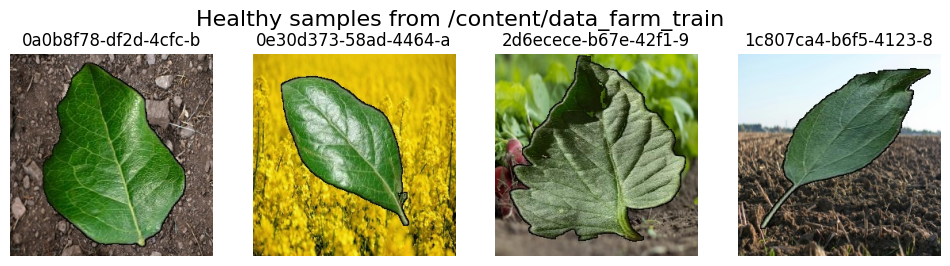

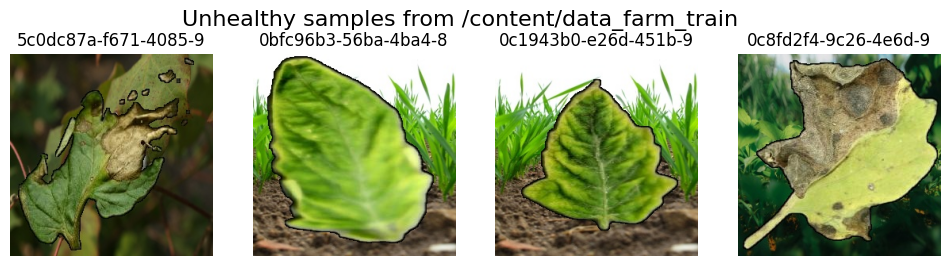

Augmented Pixel Training Set Samples:


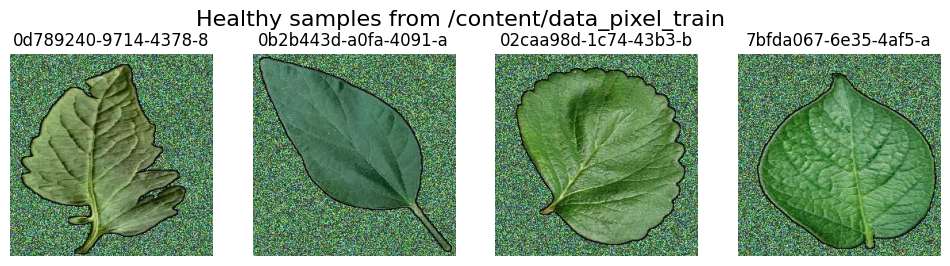

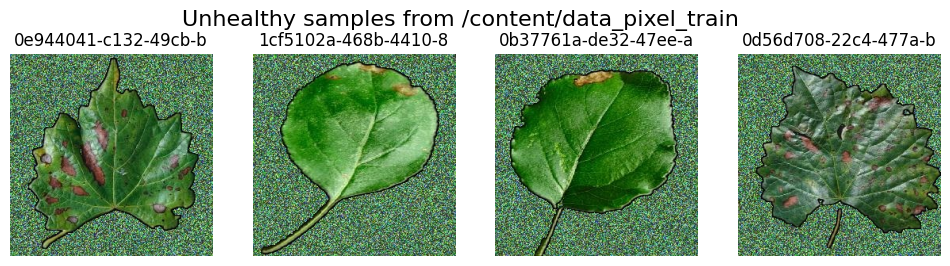

Segmented Training Set Samples:


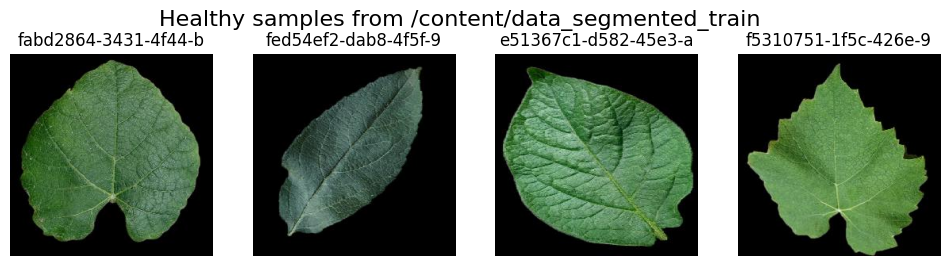

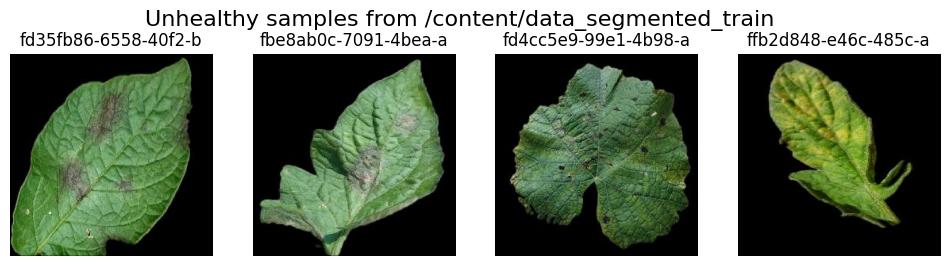

In [6]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_samples_from_category(base_dir, category, num_images=4):
    """
    Display a few sample images from a specified category folder.
    """
    cat_path = os.path.join(base_dir, category)
    # Get image filenames with common extensions
    image_files = [f for f in os.listdir(cat_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    if not image_files:
        print(f"No images found in {cat_path}")
        return
    sample_files = random.sample(image_files, min(num_images, len(image_files)))

    plt.figure(figsize=(12, 3))
    plt.suptitle(f"{category.capitalize()} samples from {base_dir}", fontsize=16)

    for i, file in enumerate(sample_files):
        img_path = os.path.join(cat_path, file)
        img = mpimg.imread(img_path)
        plt.subplot(1, len(sample_files), i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(file[:20])
    plt.show()

def show_samples_from_dataset(dataset_dir, num_images=4):
    """
    Display sample images for both healthy and unhealthy categories
    from a dataset directory that contains subfolders for each category.
    """
    for category in ['healthy', 'unhealthy']:
        show_samples_from_category(dataset_dir, category, num_images=num_images)

# Make sure these directory variables have been defined from your data splitting steps:
# dest_farm_train, dest_pixel_train, dest_segmented_train

print("Augmented Farm Training Set Samples:")
show_samples_from_dataset(dest_farm_train)

print("Augmented Pixel Training Set Samples:")
show_samples_from_dataset(dest_pixel_train)

print("Segmented Training Set Samples:")
show_samples_from_dataset(dest_segmented_train)

In [64]:
import tensorflow as tf

batch_size = 32
img_size = (224, 224)

# --- For the Augmented Farm Experiment ---
train_ds_farm = tf.keras.preprocessing.image_dataset_from_directory(
    dest_farm_train,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)
val_ds_farm = tf.keras.preprocessing.image_dataset_from_directory(
    dest_farm_val,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

# --- For the Augmented Pixel Experiment ---
train_ds_pixel = tf.keras.preprocessing.image_dataset_from_directory(
    dest_pixel_train,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)
val_ds_pixel = tf.keras.preprocessing.image_dataset_from_directory(
    dest_pixel_val,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

# --- For the Segmented Experiment ---
train_ds_segmented = tf.keras.preprocessing.image_dataset_from_directory(
    dest_segmented_train,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

val_ds_segmented = tf.keras.preprocessing.image_dataset_from_directory(
    dest_segmented_val,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)


# --- Common Test Set (from Augmented Farm Data) ---
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dest_farm_test,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

# Cache and prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
def prepare_ds(ds):
    return ds.cache().prefetch(buffer_size=AUTOTUNE)

train_ds_farm    = prepare_ds(train_ds_farm)
val_ds_farm      = prepare_ds(val_ds_farm)
train_ds_pixel   = prepare_ds(train_ds_pixel)
val_ds_pixel     = prepare_ds(val_ds_pixel)
train_ds_segmented = prepare_ds(train_ds_segmented)
val_ds_segmented = prepare_ds(val_ds_segmented)
test_ds          = prepare_ds(test_ds)

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

def create_model(input_shape=(224, 224, 3)):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze the base model

    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)  # Binary classification: healthy vs unhealthy
    model = models.Model(inputs, outputs)

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create three identical models for the experiments
model_farm = create_model()
model_pixel = create_model()
model_segmented = create_model()

# Optional: Print model summaries
model_farm.summary()
model_pixel.summary()
model_segmented.summary()

Found 647 files belonging to 2 classes.
Found 152 files belonging to 2 classes.
Found 1026 files belonging to 2 classes.
Found 190 files belonging to 2 classes.
Found 798 files belonging to 2 classes.
Found 152 files belonging to 2 classes.
Found 152 files belonging to 2 classes.


Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_67 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_27          │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_69 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_28          │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_71 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_29          │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [70]:
epochs = 10

print("Training model on Augmented Farm Data:")
history_farm = model_farm.fit(train_ds_farm, validation_data=val_ds_farm, epochs=epochs)

print("Evaluating Farm Model on Test Set:")
test_loss_farm, test_acc_farm = model_farm.evaluate(test_ds)
print("Test Accuracy (Farm Model): {:.2f}%".format(test_acc_farm * 100))


Training model on Augmented Farm Data:
Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9582 - loss: 0.1154 - val_accuracy: 0.7434 - val_loss: 0.6775
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9294 - loss: 0.1452 - val_accuracy: 0.7500 - val_loss: 0.6718
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9381 - loss: 0.1440 - val_accuracy: 0.8355 - val_loss: 0.4303
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9722 - loss: 0.1000 - val_accuracy: 0.8553 - val_loss: 0.3990
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9822 - loss: 0.0715 - val_accuracy: 0.8553 - val_loss: 0.4017
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9887 - loss: 0.0582 - val_accuracy: 0.8355 - val_loss: 0.4229
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9964 - loss: 0.0524 - val_accuracy: 0.8355 - val_loss: 0.4406
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9977 - 

In [71]:
history_dict = history_farm.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

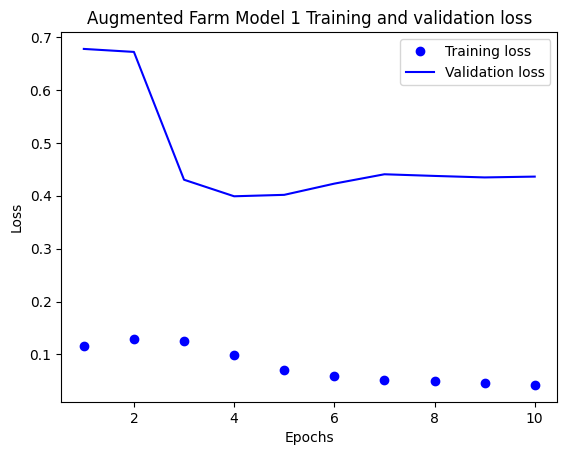

In [72]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 1 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

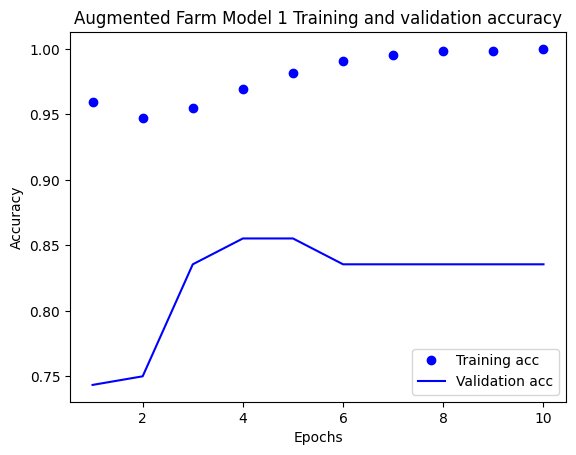

In [73]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 1 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [74]:
print("Training model on Augmented Pixel Data:")
history_pixel = model_pixel.fit(train_ds_pixel, validation_data=val_ds_pixel, epochs=epochs)

print("Evaluating Pixel Model on Test Set:")
test_loss_pixel, test_acc_pixel = model_pixel.evaluate(test_ds)
print("Test Accuracy (Pixel Model): {:.2f}%".format(test_acc_pixel * 100))

Training model on Augmented Pixel Data:
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step - accuracy: 0.7280 - loss: 0.5208 - val_accuracy: 0.8211 - val_loss: 0.4047
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7985 - loss: 0.4084 - val_accuracy: 0.9000 - val_loss: 0.2931
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8541 - loss: 0.3169 - val_accuracy: 0.8947 - val_loss: 0.2857
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8672 - loss: 0.2773 - val_accuracy: 0.8947 - val_loss: 0.2811
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8845 - loss: 0.2619 - val_accuracy: 0.9000 - val_loss: 0.2661
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9025 - loss: 0.2310 - val_accuracy: 0.8947 - val_loss: 0.2729
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9042 - loss: 0.2177 - val_accuracy: 0.9105 - val_loss: 0.2632
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9146

In [75]:
history_dict = history_pixel.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

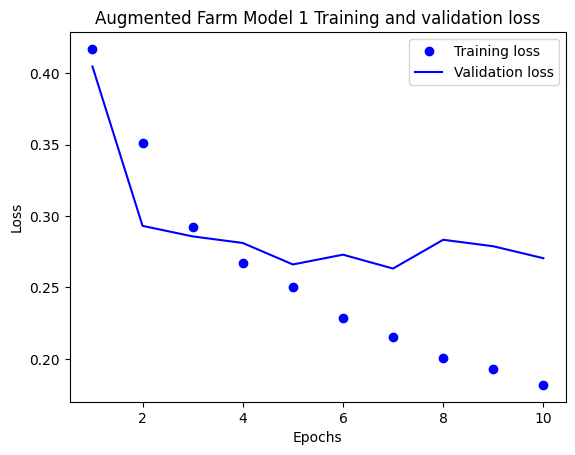

In [76]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 1 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

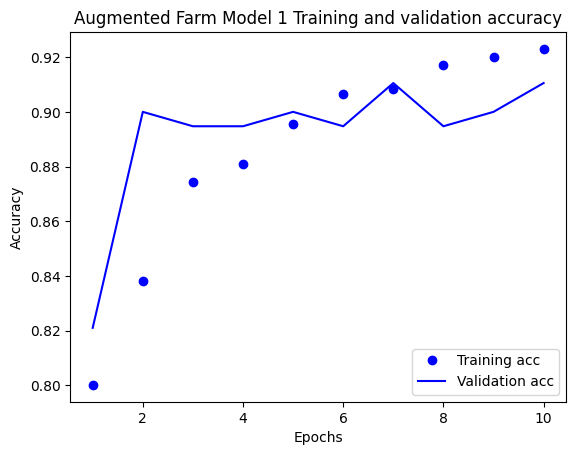

In [77]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 1 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [78]:
print("Training model on Segmented Data:")
history_segmented = model_segmented.fit(train_ds_segmented, validation_data=val_ds_segmented, epochs=epochs)


print("Evaluating Segmented Model on Test Set:")
test_loss_segmented, test_acc_segmented = model_segmented.evaluate(test_ds)
print("Test Accuracy (Segmented Model): {:.2f}%".format(test_acc_segmented * 100))

Training model on Segmented Data:
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 284ms/step - accuracy: 0.6968 - loss: 0.5662 - val_accuracy: 0.8355 - val_loss: 0.3654
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8492 - loss: 0.3233 - val_accuracy: 0.8816 - val_loss: 0.3103
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9016 - loss: 0.2463 - val_accuracy: 0.8947 - val_loss: 0.2776
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9283 - loss: 0.2003 - val_accuracy: 0.9079 - val_loss: 0.2541
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9514 - loss: 0.1614 - val_accuracy: 0.9013 - val_loss: 0.2445
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9656 - loss: 0.1338 - val_accuracy: 0.8816 - val_loss: 0.2460
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9760 - loss: 0.1109 - val_accuracy: 0.8750 - val_loss: 0.2493
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9901 - los

In [79]:
history_dict = history_segmented.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

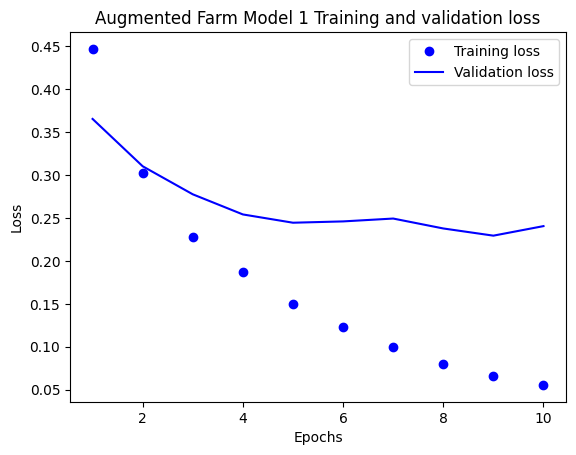

In [80]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 1 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

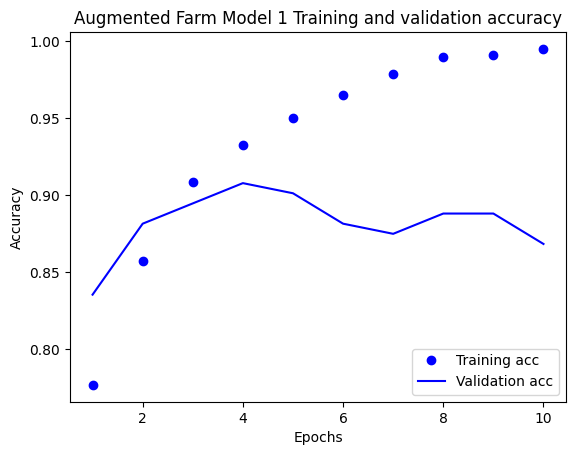

In [81]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 1 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [128]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

def create_improved_model1(input_shape=(224, 224, 3), dropout_rate=0.5):
    # Data augmentation layers (active only during training)
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ])

    inputs = tf.keras.Input(shape=input_shape)
    # Apply data augmentation to the inputs
    x = data_augmentation(inputs)

    # Load the pre-trained MobileNetV2 model and freeze its weights
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False
    x = base_model(x, training=False)

    # Global pooling and dense layers for classification
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    # Dropout to reduce overfitting
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)  # Binary classification: healthy vs unhealthy

    model = models.Model(inputs, outputs)

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create three improved models for the experiments
model_farm = create_improved_model1()
model_pixel = create_improved_model1()
model_segmented = create_improved_model1()

# Optional: Print model summaries
model_farm.summary()
model_pixel.summary()
model_segmented.summary()

Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_93 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_15 (Sequential)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_39          │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_96 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_16 (Sequential)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_40          │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_99 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_17 (Sequential)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_41          │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [129]:
epochs = 10

print("Training model on Augmented Farm Data:")
history_farm = model_farm.fit(train_ds_farm, validation_data=val_ds_farm, epochs=epochs)

print("Evaluating Farm Model on Test Set:")
test_loss_farm, test_acc_farm = model_farm.evaluate(test_ds)
print("Test Accuracy (Farm Model): {:.2f}%".format(test_acc_farm * 100))

Training model on Augmented Farm Data:
Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.6321 - loss: 0.7170 - val_accuracy: 0.7697 - val_loss: 0.5468
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7404 - loss: 0.5115 - val_accuracy: 0.7829 - val_loss: 0.5150
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7790 - loss: 0.4758 - val_accuracy: 0.8026 - val_loss: 0.4880
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7866 - loss: 0.4710 - val_accuracy: 0.7895 - val_loss: 0.5069
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7934 - loss: 0.4758 - val_accuracy: 0.7763 - val_loss: 0.5181
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7942 - loss: 0.4232 - val_accuracy: 0.7632 - val_loss: 0.5014
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8032 - loss: 0.4502 - val_accuracy: 0.7697 - val_loss: 0.5107
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8346 - 

In [130]:
history_dict = history_farm.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

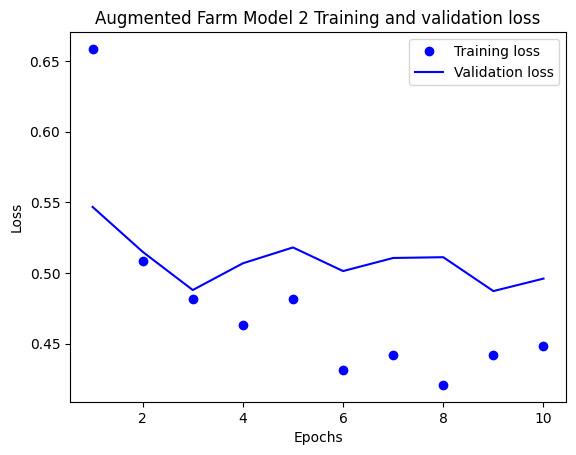

In [131]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 2 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

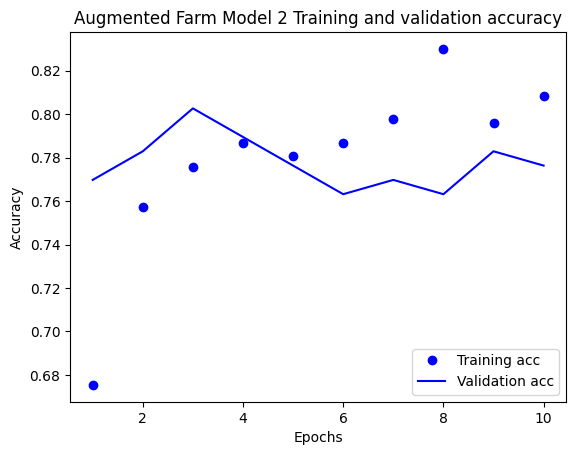

In [132]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 2 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [133]:
print("Training model on Augmented Pixel Data:")
history_pixel = model_pixel.fit(train_ds_pixel, validation_data=val_ds_pixel, epochs=epochs)

print("Evaluating Pixel Model on Test Set:")
test_loss_pixel, test_acc_pixel = model_pixel.evaluate(test_ds)
print("Test Accuracy (Pixel Model): {:.2f}%".format(test_acc_pixel * 100))

Training model on Augmented Pixel Data:
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.6986 - loss: 0.5984 - val_accuracy: 0.8526 - val_loss: 0.3642
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7984 - loss: 0.4208 - val_accuracy: 0.8474 - val_loss: 0.3635
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8190 - loss: 0.3829 - val_accuracy: 0.8842 - val_loss: 0.3188
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8055 - loss: 0.3899 - val_accuracy: 0.8947 - val_loss: 0.3142
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8173 - loss: 0.3636 - val_accuracy: 0.8737 - val_loss: 0.3474
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7906 - loss: 0.4399 - val_accuracy: 0.8947 - val_loss: 0.3115
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7971 - loss: 0.3758 - val_accuracy: 0.8842 - val_loss: 0.2934
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8208 -

In [134]:
history_dict = history_pixel.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

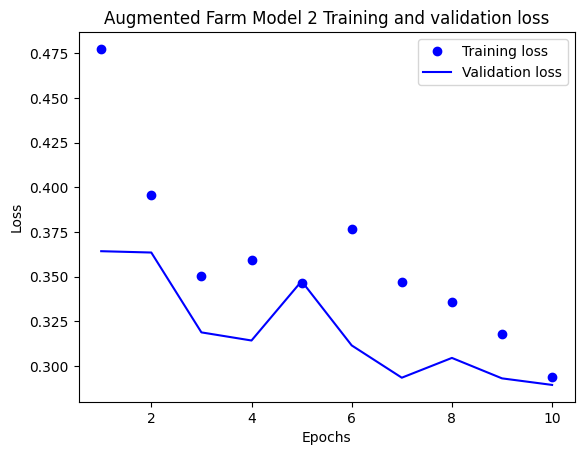

In [135]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 2 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

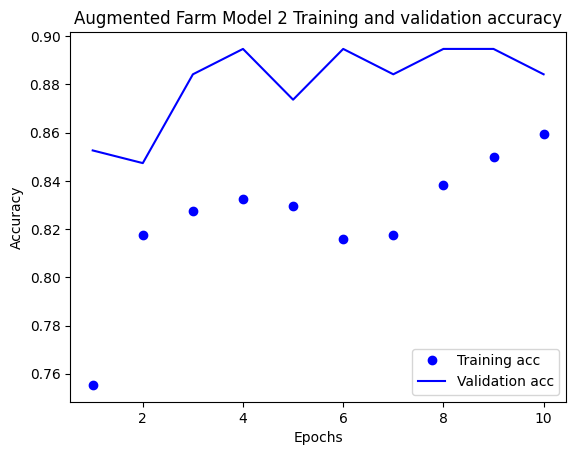

In [136]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 2 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [137]:
print("Training model on Segmented Data:")
history_segmented = model_segmented.fit(train_ds_segmented, validation_data=val_ds_segmented, epochs=epochs)


print("Evaluating Segmented Model on Test Set:")
test_loss_segmented, test_acc_segmented = model_segmented.evaluate(test_ds)
print("Test Accuracy (Segmented Model): {:.2f}%".format(test_acc_segmented * 100))

Training model on Segmented Data:
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.6705 - loss: 0.6845 - val_accuracy: 0.7632 - val_loss: 0.5379
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8013 - loss: 0.4523 - val_accuracy: 0.8026 - val_loss: 0.5048
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7844 - loss: 0.4258 - val_accuracy: 0.8224 - val_loss: 0.4630
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8172 - loss: 0.3947 - val_accuracy: 0.8224 - val_loss: 0.4736
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8231 - loss: 0.4043 - val_accuracy: 0.8487 - val_loss: 0.3983
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8154 - loss: 0.3893 - val_accuracy: 0.8553 - val_loss: 0.4136
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8931 - loss: 0.3112 - val_accuracy: 0.8092 - val_loss: 0.4584
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8345 - loss:

In [101]:
history_dict = history_segmented.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

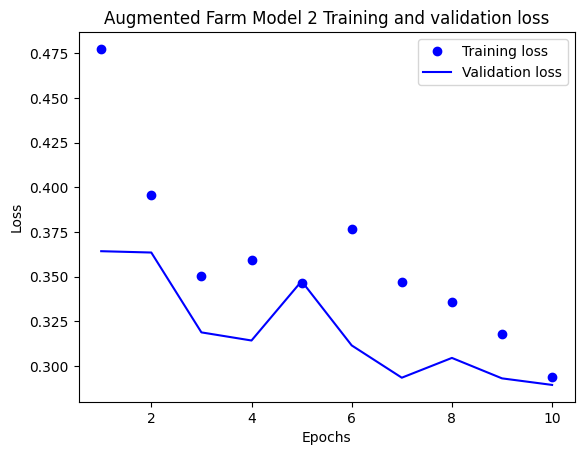

In [138]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 2 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

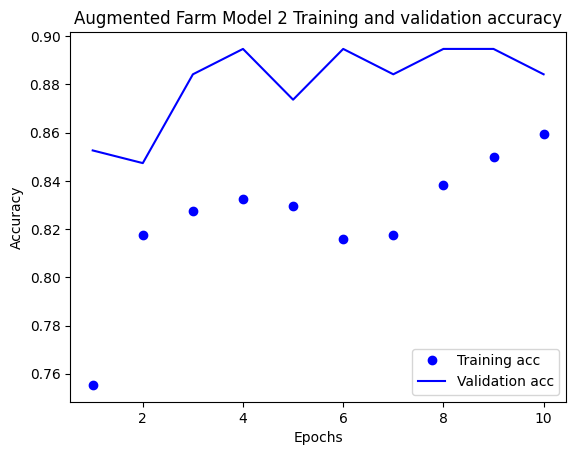

In [139]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 2 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [105]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications import MobileNetV2

def create_improved_model2(input_shape=(224, 224, 3), l2_factor=0.001):
    # Load the MobileNetV2 base model with pre-trained weights
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze the base model

    # Define the input layer and pass it through the base model
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)

    # Global average pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Dense layer with ReLU activation and L2 regularization
    x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_factor))(x)

    # Output layer for binary classification
    outputs = layers.Dense(1, activation='sigmoid')(x)

    # Create the model
    model = models.Model(inputs, outputs)

    # Compile the model using binary crossentropy loss
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create three improved models for the experiments
model_farm = create_improved_model2()
model_pixel = create_improved_model2()
model_segmented = create_improved_model2()

# Optional: Print model summaries
model_farm.summary()
model_pixel.summary()
model_segmented.summary()

# Define an EarlyStopping callback to halt training when validation loss stops improving
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_88 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_36          │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_90 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_37          │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_92 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_38          │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [106]:
# Example training code for the Augmented Farm Data model:
epochs = 10
print("Training model on Augmented Farm Data with Early Stopping and L2 regularization:")
history_farm = model_farm.fit(train_ds_farm,
                              validation_data=val_ds_farm,
                              epochs=epochs,
                              callbacks=[early_stopping])

print("Evaluating Farm Model on Test Set:")
test_loss_farm, test_acc_farm = model_farm.evaluate(test_ds)
print("Test Accuracy (Farm Model): {:.2f}%".format(test_acc_farm * 100))

Training model on Augmented Farm Data with Early Stopping and L2 regularization:
Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 354ms/step - accuracy: 0.6852 - loss: 0.8250 - val_accuracy: 0.7961 - val_loss: 0.6095
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8125 - loss: 0.5648 - val_accuracy: 0.8026 - val_loss: 0.6034
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8319 - loss: 0.5248 - val_accuracy: 0.7303 - val_loss: 0.6379
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8294 - loss: 0.5039 - val_accuracy: 0.7434 - val_loss: 0.6178
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7953 - loss: 0.5001 - val_accuracy: 0.8421 - val_loss: 0.5055
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8515 - loss: 0.4347 - val_accuracy: 0.8618 - val_loss: 0.4817
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8842 - loss: 0.3932 - val_accuracy: 0.8618 - val_loss: 0.4721
Epoch 8/10
21/21 ━━━━━━━━━━━

In [107]:
history_dict = history_farm.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

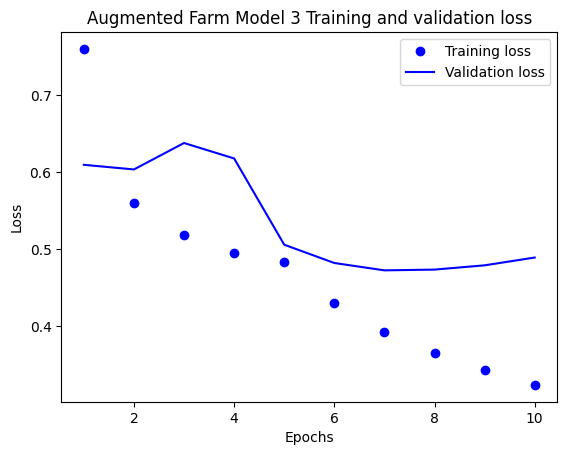

In [110]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 3 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

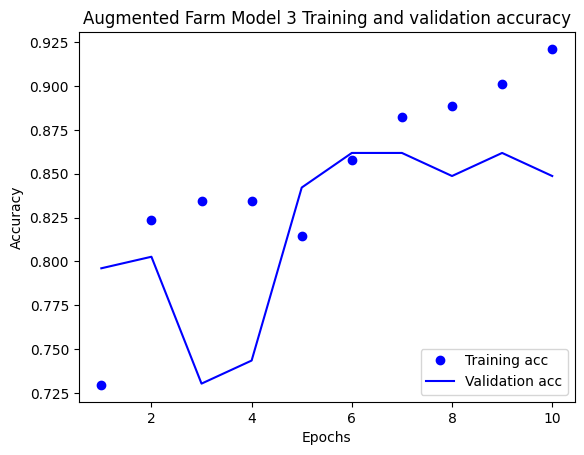

In [111]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 3 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [113]:
history_pixel = model_pixel.fit(train_ds_pixel, validation_data=val_ds_pixel, epochs=epochs, callbacks=[early_stopping])

print("Evaluating Pixel Model on Test Set:")
test_loss_pixel, test_acc_pixel = model_pixel.evaluate(test_ds)
print("Test Accuracy (Pixel Model): {:.2f}%".format(test_acc_pixel * 100))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 244ms/step - accuracy: 0.7751 - loss: 0.6589 - val_accuracy: 0.8421 - val_loss: 0.5060
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8157 - loss: 0.4973 - val_accuracy: 0.8421 - val_loss: 0.4582
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8270 - loss: 0.4480 - val_accuracy: 0.8947 - val_loss: 0.3686
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8829 - loss: 0.3524 - val_accuracy: 0.8526 - val_loss: 0.4128
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8654 - loss: 0.3524 - val_accuracy: 0.8421 - val_loss: 0.4174
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8806 - loss: 0.3417 - val_accuracy: 0.9000 - val_loss: 0.3438
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8938 - loss: 0.3007 - val_accuracy: 0.9105 - val_loss: 0.3319
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9046 - loss: 0.2724 - val_accuracy: 0.8895 -

In [114]:
history_dict = history_pixel.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

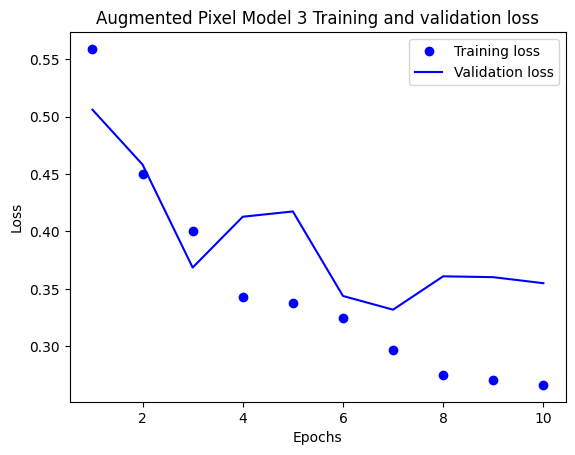

In [115]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Pixel Model 3 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

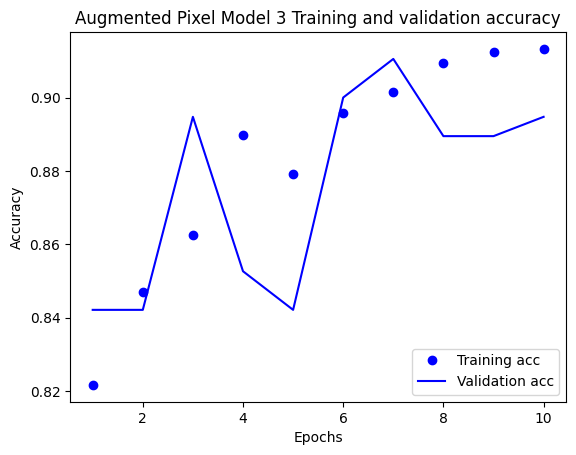

In [116]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Pixel Model 3 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [124]:
history_segmented = model_segmented.fit(train_ds_segmented, validation_data=val_ds_segmented, epochs=epochs, callbacks=[early_stopping])

print("Evaluating Segmented Model on Test Set:")
test_loss_segmented, test_acc_segmented = model_segmented.evaluate(test_ds)
print("Test Accuracy (Segmented Model): {:.2f}%".format(test_acc_segmented * 100))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9970 - loss: 0.1339 - val_accuracy: 0.8882 - val_loss: 0.3114
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9953 - loss: 0.1263 - val_accuracy: 0.8355 - val_loss: 0.5291
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9662 - loss: 0.1636 - val_accuracy: 0.8750 - val_loss: 0.3450
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9935 - loss: 0.1267 - val_accuracy: 0.8750 - val_loss: 0.3466
Evaluating Segmented Model on Test Set:
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8026 - loss: 1.0566
Test Accuracy (Segmented Model): 76.97%


In [125]:
history_dict = history_segmented.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

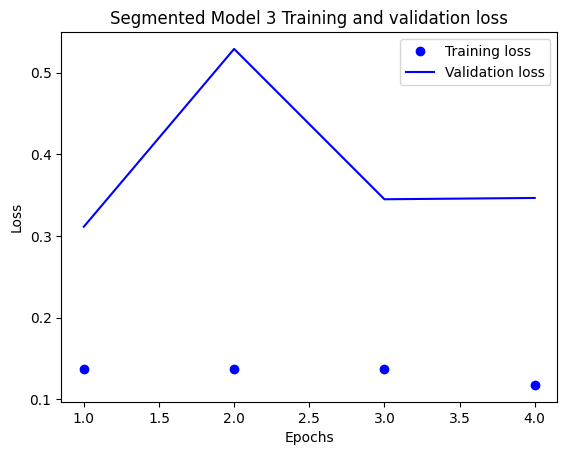

In [126]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Segmented Model 3 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

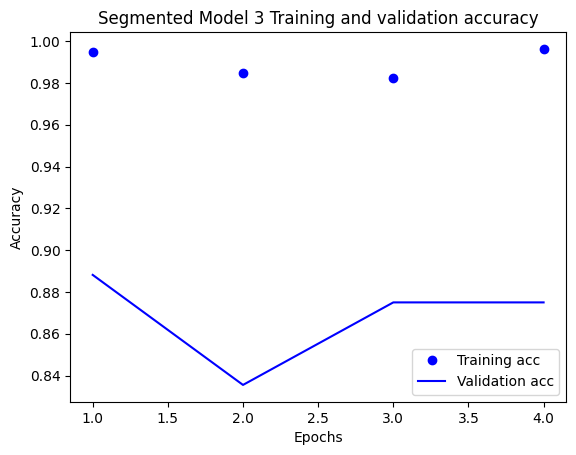

In [127]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Segmented Model 3 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [142]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications import MobileNetV2

def create_improved_model3(input_shape=(224, 224, 3), l2_factor=0.001):
    # Load the MobileNetV2 base model with pre-trained weights and freeze it.
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False

    # Define the input layer.
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)

    # Global average pooling to reduce spatial dimensions.
    x = layers.GlobalAveragePooling2D()(x)

    # Dense layer with ReLU activation and L2 regularization.
    x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_factor))(x)

    # Additional Dense layer for further feature transformation.
    x = layers.Dense(64, activation='relu')(x)

    # Output layer for binary classification (healthy vs unhealthy).
    outputs = layers.Dense(1, activation='sigmoid')(x)

    # Create and compile the model.
    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create three identical models for the experiments
model_farm = create_improved_model3()
model_pixel = create_improved_model3()
model_segmented = create_improved_model3()

# Optional: Print model summaries
model_farm.summary()
model_pixel.summary()
model_segmented.summary()

Model: "functional_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_115 (InputLayer)         │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_50          │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,430,273 (9.27 MB)

 Trainable params: 172,289 (673.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_117 (InputLayer)         │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_51          │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,430,273 (9.27 MB)

 Trainable params: 172,289 (673.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_119 (InputLayer)         │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_52          │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,430,273 (9.27 MB)

 Trainable params: 172,289 (673.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [144]:
# Example training code for the Augmented Farm Data model:
epochs = 10
print("Training model on Augmented Farm Data with Early Stopping and L2 regularization:")
history_farm = model_farm.fit(train_ds_farm,
                              validation_data=val_ds_farm,
                              epochs=epochs,
                              callbacks=[early_stopping])

print("Evaluating Farm Model on Test Set:")
test_loss_farm, test_acc_farm = model_farm.evaluate(test_ds)
print("Test Accuracy (Farm Model): {:.2f}%".format(test_acc_farm * 100))

Training model on Augmented Farm Data with Early Stopping and L2 regularization:
Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7984 - loss: 0.5982 - val_accuracy: 0.7763 - val_loss: 0.6333
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8338 - loss: 0.5402 - val_accuracy: 0.7961 - val_loss: 0.5844
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8468 - loss: 0.4785 - val_accuracy: 0.7105 - val_loss: 0.6836
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8338 - loss: 0.4886 - val_accuracy: 0.6974 - val_loss: 0.7079
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8381 - loss: 0.4856 - val_accuracy: 0.8487 - val_loss: 0.5135
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8345 - loss: 0.4447 - val_accuracy: 0.8355 - val_loss: 0.4623
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8739 - loss: 0.3769 - val_accuracy: 0.8618 - val_loss: 0.4653
Epoch 8/10
21/21 ━━━━━━━━━━━━━

In [145]:
history_dict = history_farm.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

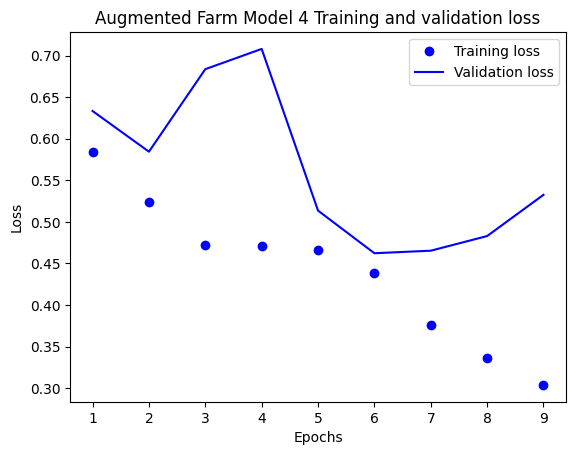

In [146]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Farm Model 4 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

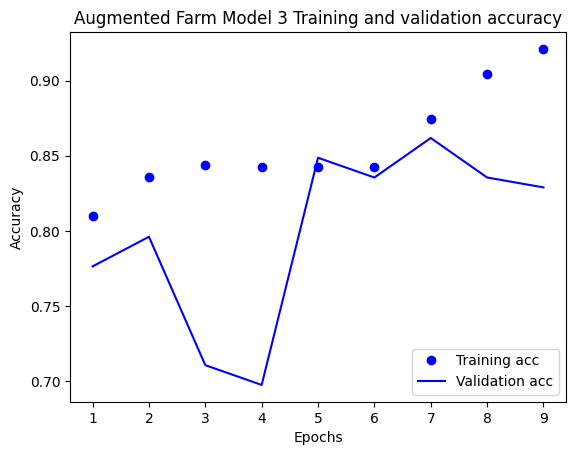

In [147]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Farm Model 3 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [148]:
history_pixel = model_pixel.fit(train_ds_pixel, validation_data=val_ds_pixel, epochs=epochs, callbacks=[early_stopping])

print("Evaluating Pixel Model on Test Set:")
test_loss_pixel, test_acc_pixel = model_pixel.evaluate(test_ds)
print("Test Accuracy (Pixel Model): {:.2f}%".format(test_acc_pixel * 100))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 298ms/step - accuracy: 0.7239 - loss: 0.7789 - val_accuracy: 0.8000 - val_loss: 0.5834
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7830 - loss: 0.5577 - val_accuracy: 0.8842 - val_loss: 0.3892
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8389 - loss: 0.4282 - val_accuracy: 0.8632 - val_loss: 0.4161
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8458 - loss: 0.3968 - val_accuracy: 0.8842 - val_loss: 0.3677
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8602 - loss: 0.3644 - val_accuracy: 0.9053 - val_loss: 0.3417
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8877 - loss: 0.3245 - val_accuracy: 0.9105 - val_loss: 0.3308
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8984 - loss: 0.2960 - val_accuracy: 0.8895 - val_loss: 0.3502
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8994 - loss: 0.2891 - val_accuracy: 0.8789 -

In [149]:
history_dict = history_pixel.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

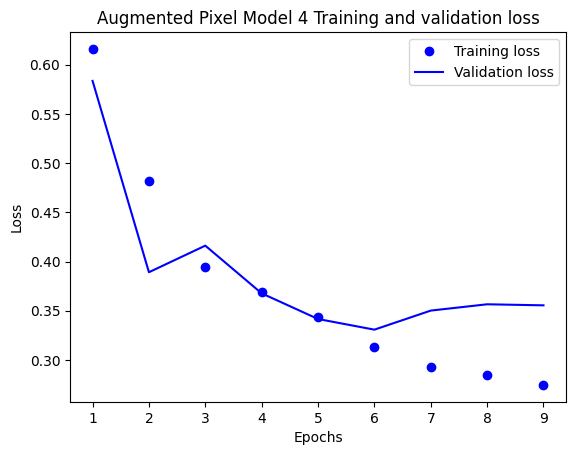

In [150]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Augmented Pixel Model 4 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

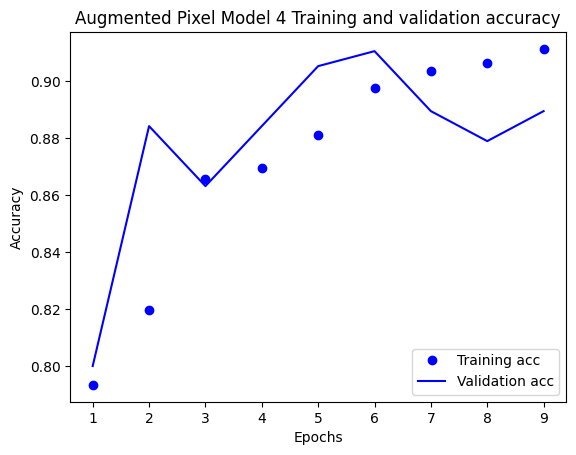

In [151]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Augmented Pixel Model 4 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [152]:
history_segmented = model_segmented.fit(train_ds_segmented, validation_data=val_ds_segmented, epochs=epochs, callbacks=[early_stopping])

print("Evaluating Segmented Model on Test Set:")
test_loss_segmented, test_acc_segmented = model_segmented.evaluate(test_ds)
print("Test Accuracy (Segmented Model): {:.2f}%".format(test_acc_segmented * 100))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 358ms/step - accuracy: 0.8002 - loss: 0.6722 - val_accuracy: 0.8487 - val_loss: 0.5522
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8495 - loss: 0.4990 - val_accuracy: 0.8750 - val_loss: 0.4715
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8982 - loss: 0.3892 - val_accuracy: 0.9013 - val_loss: 0.4199
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9408 - loss: 0.3144 - val_accuracy: 0.9079 - val_loss: 0.3944
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9497 - loss: 0.2685 - val_accuracy: 0.9079 - val_loss: 0.4016
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9695 - loss: 0.2279 - val_accuracy: 0.9079 - val_loss: 0.3829
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9705 - loss: 0.2063 - val_accuracy: 0.8816 - val_loss: 0.3613
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9462 - loss: 0.2431 - val_accuracy: 0.7697 -

In [153]:
history_dict = history_segmented.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

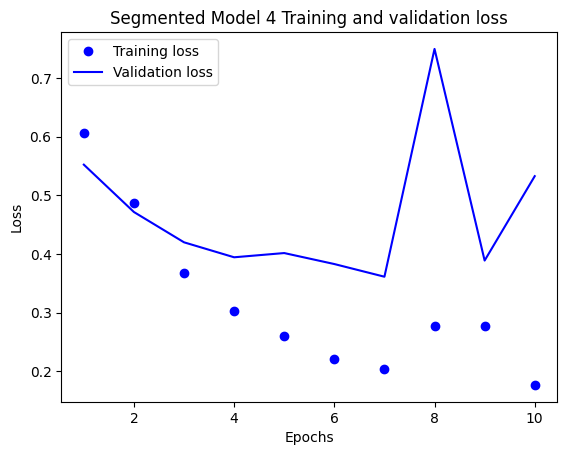

In [154]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_graph = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs_graph, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_graph, val_loss, 'b', label='Validation loss')
plt.title('Segmented Model 4 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

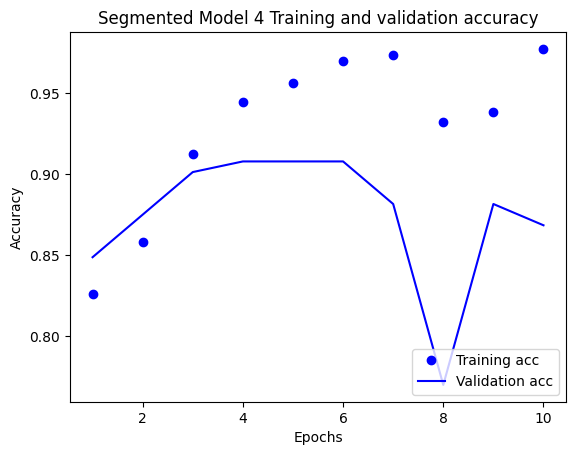

In [155]:
plt.plot(epochs_graph, acc, 'bo', label='Training acc')
plt.plot(epochs_graph, val_acc, 'b', label='Validation acc')
plt.title('Segmented Model 4 Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()